In [1]:
NYC_Poverty <- read.csv("NYCgov_Poverty_Measure_Data__2018_.csv")

library(ggplot2)
library(broom)
library(dplyr)
library(stringr)
library(tidyverse)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
subset <- NYC_Poverty[, c("SERIALNO", "AGEP", "CIT", "SEX", "ESR", "LANX", "ENG", "MAR", "DIS", "TEN", 'FamType_PU', "WAGP_adj", "SSP_adj", "RNTP_adj", "Ethnicity", "Boro", "EducAttain", "FTPTWork", "Off_Pov_Stat", "NYCgov_Income", "NYCgov_Pov_Stat", "NYCgov_Childcare", "NYCgov_Commuting", "NYCgov_MOOP", "NYCgov_MedSpending", "NYCgov_MedPremiums", "NYCgov_HEAP", "NYCgov_SNAP", "NYCgov_SchoolLunch", "NYCgov_SchoolBreakfast", 'NYCgov_Nutrition',"NYCgov_FICAtax", "NYCgov_IncomeTax", "NYCgov_PovGap", "NYCgov_PovGapIndex")]

In [3]:
eth.name = c('Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian',
             'Hispanic','Others')
subset$Ethnicity = factor(subset$Ethnicity,levels = 1:5,labels = eth.name)

Warning message:
“Removed 62378 rows containing non-finite values (stat_boxplot).”


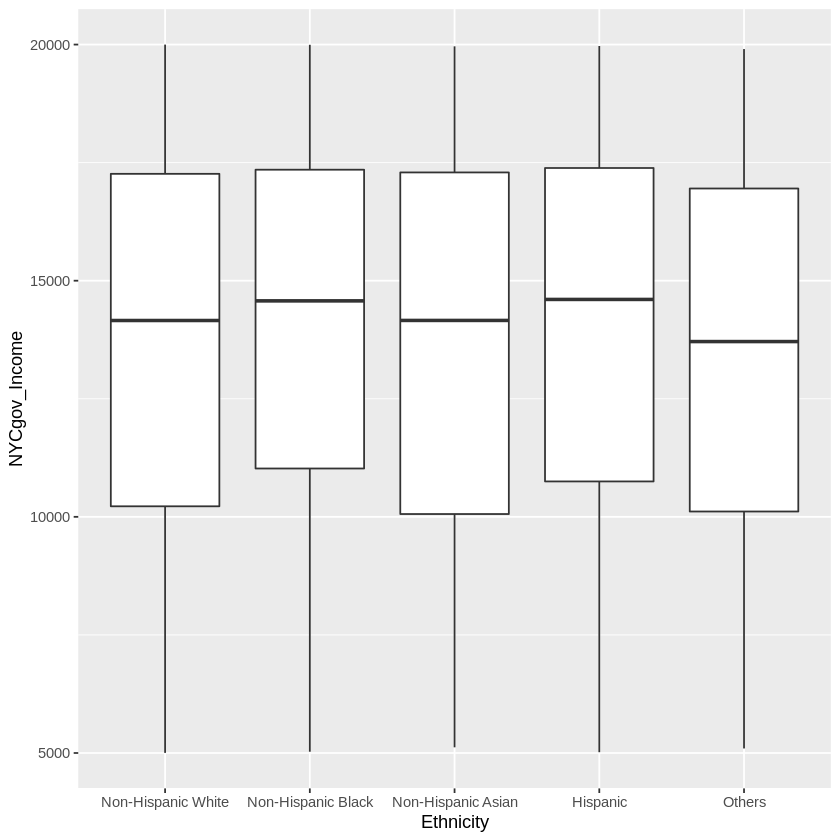

In [4]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_Income))+geom_boxplot()+ylim(5000, 20000)

In [5]:
opar = par(no.readonly =TRUE)
par(mar=c(5,1.8,0.3,1),pin=c(4.8,2.5))
Edu.name = c('less than HS','High School','Some College','Bachelors or higher')
subset$EducAttain = factor(subset$EducAttain,labels = Edu.name)
edu.t = prop.table(table(subset$Ethnicity,subset$EducAttain),1)
edu.t

                    
                     less than HS High School Some College Bachelors or higher
  Non-Hispanic White    0.1959017   0.1603022    0.1559200           0.4878761
  Non-Hispanic Black    0.2946456   0.2466438    0.2406338           0.2180768
  Non-Hispanic Asian    0.3343031   0.1563079    0.1508419           0.3585471
  Hispanic              0.4196519   0.2177725    0.2043391           0.1582366
  Others                0.3828624   0.1481313    0.1681860           0.3008204

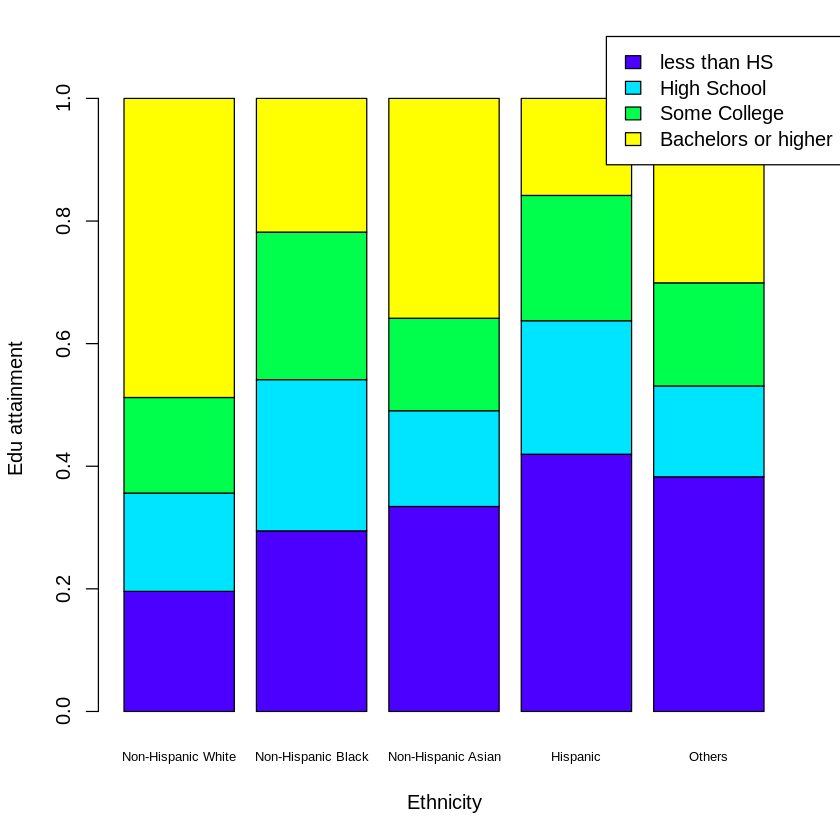

In [6]:
barplot(t(edu.t),col = topo.colors(4),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Edu attainment')
legend(x='topright',legend = rownames(t(edu.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

Warning message:
“Removed 9743 rows containing non-finite values (stat_boxplot).”


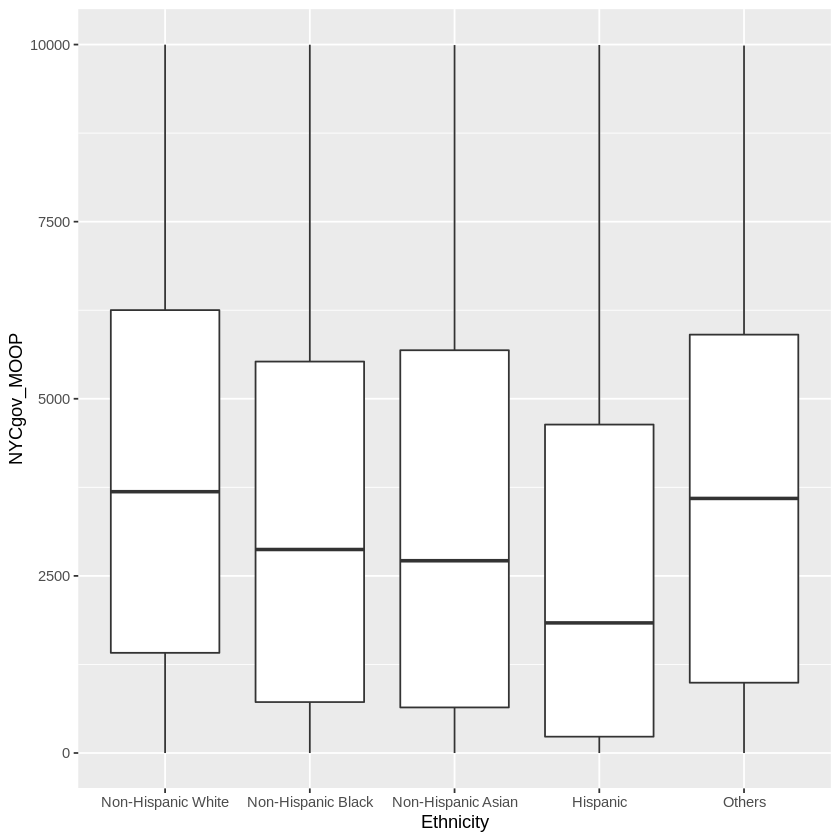

In [7]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_MOOP))+geom_boxplot()+ylim(0, 10000) 

In [8]:
nrow(subset)

[1] 68273

In [9]:
subset$CIT <- recode(subset$CIT, '1'='US citizen', '2'='US citizen', '3'='US citizen', '4'='US citizen', '5'='Non citizen')
subset$SEX <- recode(subset$SEX, '1'='Male', '2'='Female')
subset$Boro <- recode(subset$Boro, '1'='Bronx','2'='Brooklyn', '3'='Manhattan', '4'='Queens', '5'='Staten Island')
subset$ENG <- recode(subset$ENG, '1'='Very well','2'='Well', '3'='Not well', '4'='Not at all')
subset$LANX <- recode(subset$LANX, '1'='Speaks other language','2'='Speaks only English')
subset$MAR <- recode(subset$MAR, '1'='Married','2'='Widowed', '3'='Divorced', '4'='Separated', '5'='Never married or under 15')
subset$DIS <- recode(subset$DIS, '1'='Disability','2'='No disability')
subset$TEN <- recode(subset$TEN, '1'='Owned with mortgage or loan','2'='Owned free and clear', '3'='Rented', '4'='Occupied without payment of rent')
subset$FamType_PU <- recode(subset$FamType_PU, '1'='Husband/Wife+child ','2'='Husband/Wife no child ', '3'='Single Male+child', '4'='Single Female+child', '5'='Male unit head, no child','6'='Female unit head, no child','7'='Unrelated Indiv w/others','8'='Unrelated Indiv Alone')
subset$FTPTWork <- recode(subset$FTPTWork, '1'='Full Time Year Round','2'='Part time','3'='No work')


In [10]:
subset_asians <- subset %>%
    filter(Ethnicity == "Non-Hispanic Asian")

In [21]:
mlr1 <- lm(NYCgov_Income ~ EducAttain+FTPTWork+Boro+ENG+CIT+MAR+SEX+DIS+TEN+FamType_PU+AGEP+NYCgov_MOOP+NYCgov_Nutrition+NYCgov_SchoolLunch+NYCgov_Commuting+NYCgov_Childcare+NYCgov_HEAP, subset_asians)
summary(mlr1) # missing values get treated and removed automatically, and categorical var receive automatic dummy treatment
tidy(mlr1)


Call:
lm(formula = NYCgov_Income ~ EducAttain + FTPTWork + Boro + ENG + 
    CIT + MAR + SEX + DIS + TEN + FamType_PU + AGEP + NYCgov_MOOP + 
    NYCgov_Nutrition + NYCgov_SchoolLunch + NYCgov_Commuting + 
    NYCgov_Childcare + NYCgov_HEAP, data = subset_asians)

Residuals:
    Min      1Q  Median      3Q     Max 
-160154  -27643   -6346   17376  573953 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         3.998e+04  7.540e+03   5.302 1.17e-07 ***
EducAttainHigh School              -3.508e+03  1.759e+03  -1.995 0.046127 *  
EducAttainSome College              1.456e+01  1.862e+03   0.008 0.993761    
EducAttainBachelors or higher       1.433e+04  1.718e+03   8.338  < 2e-16 ***
FTPTWorkNo work                    -1.385e+04  1.497e+03  -9.252  < 2e-16 ***
FTPTWorkPart time                  -1.316e+04  1.535e+03  -8.571  < 2e-16 ***
BoroBrooklyn                        7.416e+03  2.843e+03   2.608 0.009110 ** 
Bo

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.998189e+04,7540.3247572,5.302409066,1.170296e-07
EducAttainHigh School,-3.508435e+03,1759.0450436,-1.994511117,4.612671e-02
EducAttainSome College,1.455993e+01,1861.8576568,0.007820109,9.937607e-01
EducAttainBachelors or higher,1.432663e+04,1718.1555998,8.338379899,8.655485e-17
FTPTWorkNo work,-1.385309e+04,1497.2274042,-9.252495585,2.704316e-20
FTPTWorkPart time,-1.315960e+04,1535.3565503,-8.571039602,1.197499e-17
BoroBrooklyn,7.415528e+03,2842.8647889,2.608470132,9.110011e-03
BoroManhattan,4.161010e+04,3291.9319533,12.640023471,2.604654e-36
BoroQueens,4.024037e+03,2780.4371113,1.447267713,1.478572e-01


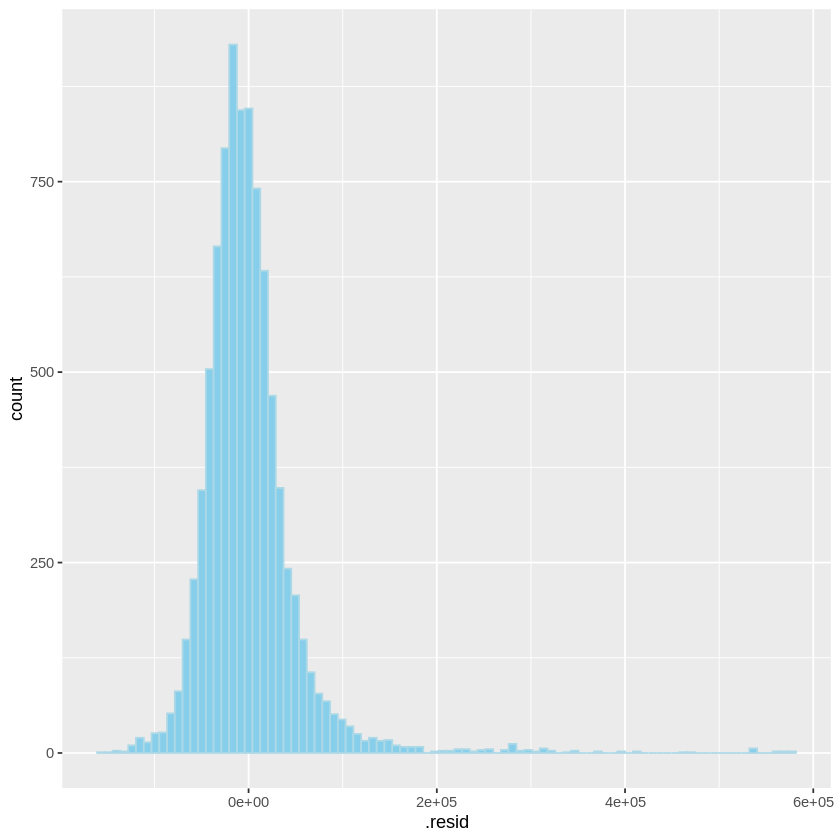

In [16]:
mlr1_aug <- augment(mlr1)
ggplot(mlr1_aug, aes(x = .resid)) +
    geom_histogram(colour = "lightblue", fill = "skyblue", bins = 90) # distribution of residuals

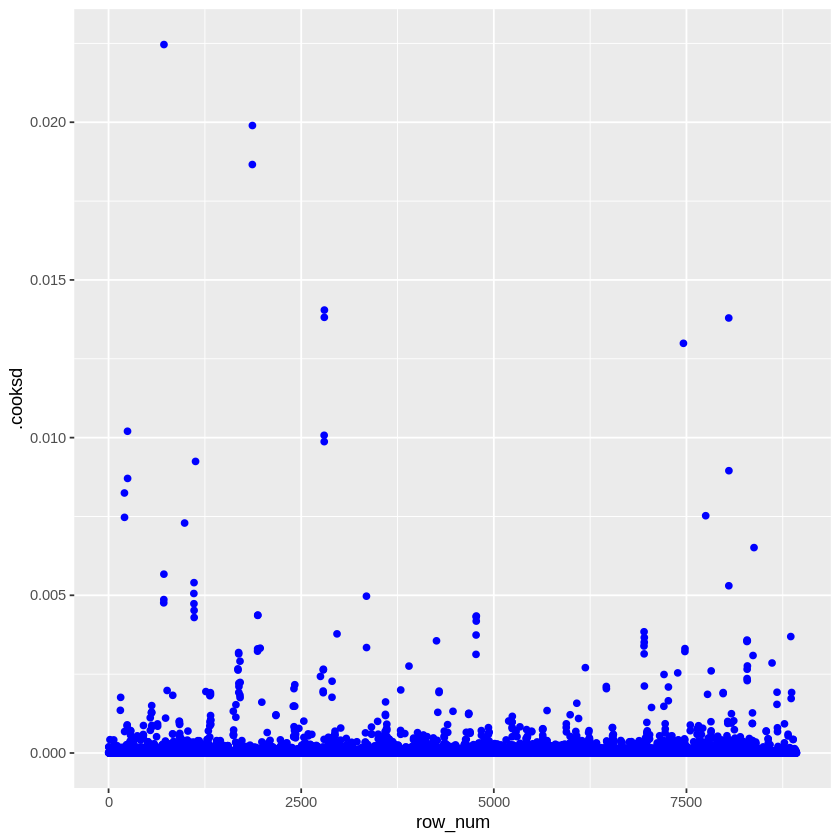

In [17]:
mlr1_aug$row_num <- 1:nrow(mlr1_aug)

ggplot(mlr1_aug, aes(x = row_num, y = .cooksd)) +
    geom_point(colour = "blue")

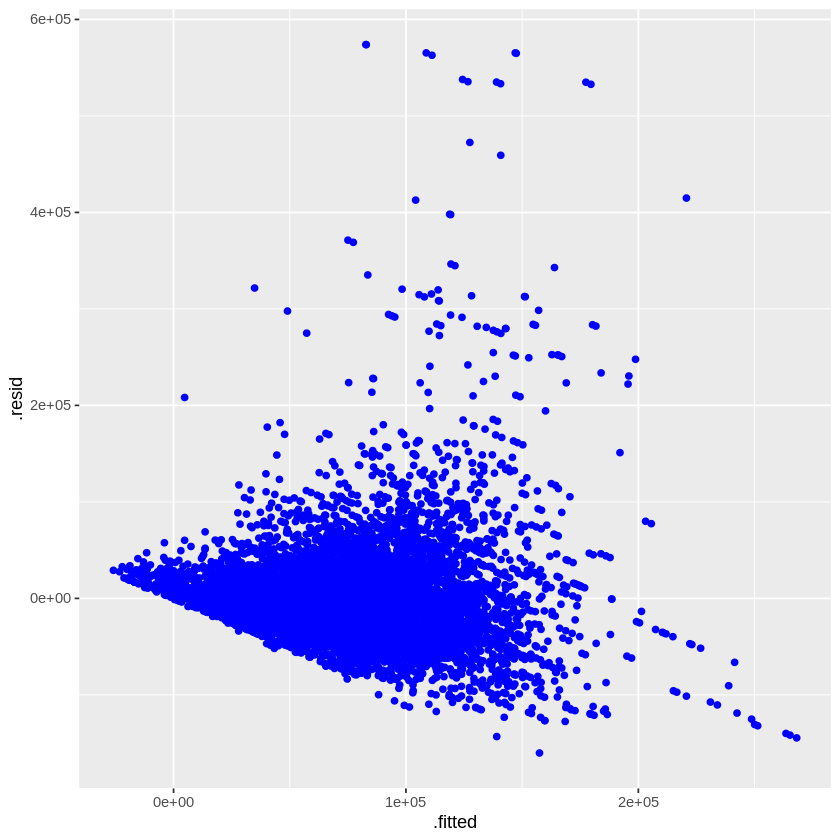

In [18]:
ggplot(mlr1_aug, aes(x = .fitted, y = .resid)) +
    geom_point(colour = "blue")